在 Python 中執行 Simulink 模擬



In [1]:
import matlab.engine as eng
import matplotlib.pyplot as plt
from matplotlib import style
import os

In [19]:
# 找到現有執行中的 MATLAB Session ID
# In MATLAB: matlab.engine.shareEngine
matlab_ID = eng.find_matlab()
print(matlab_ID)

# 選取欲建立連結的 MATLAB Session
sess = eng.connect_matlab(matlab_ID[0])
print(sess)

('MATLAB_13200',)


EngineError: Unable to connect to MATLAB session 'MATLAB_13200'.

建立 Simulink 模型物件

In [31]:
Model_path = 'C:/Users/Tim/Desktop/terasoft/活動與研討會資料/MTK Day/Demo/Call Simulink Model From Python'
os.chdir(Model_path)
simInp = sess.Simulink.SimulationInput('MassSpringDamperModel')
print(type(simInp))

<class 'matlab.object'>


In [32]:
# Parameters Configuration
Stiffness = 128.0     # N/m
Mass = 2.0            # kg
Damping = 3.0         # N/m
InitialPosition = 0.0 # m

修改 Simulink Block 參數

In [33]:
# Set up parameters in Simulink blocks
simInp = sess.setVariable(simInp,'k',Stiffness)
simInp = sess.setVariable(simInp,'m',Mass)
simInp = sess.setVariable(simInp,'b',Damping)
simInp = sess.setVariable(simInp,'x0',InitialPosition)

In [34]:
# set the model parameters for this run
stopTime  = 20.0 # seconds
stopTimeStr = sess.num2str(stopTime)
simInp = sess.setModelParameter(simInp,'StopTime', stopTimeStr)

執行模擬

In [35]:
# run
simOut = sess.sim(simInp)

取回模擬結果

In [36]:
#  extract and plot the results
sess.workspace['simOut'] = simOut
t = sess.eval('simOut.y.time')
yp = sess.eval('simOut.y.signals(1).values')
yv = sess.eval('simOut.y.signals(2).values')

繪製模擬結果

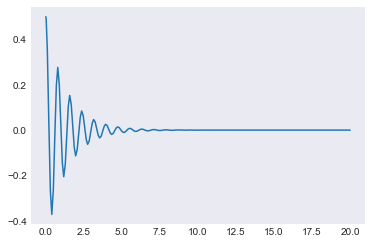

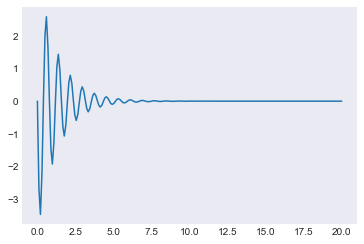

In [37]:
style.use('seaborn-dark')
plt.figure()
plt.plot(t, yp)
plt.figure()
plt.plot(t, yv)